In [4]:
run_name = 'current'

In [1]:
import os
import glob
from functools import reduce

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Client-side analysis

In [6]:
# read in the data
data_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*"):
    data_list = []
    for i in glob.glob(d + "/httperf_client_*.csv"):
        data_list.append(pd.read_csv(i, header=0, na_filter=False))

    data_frame = pd.DataFrame()
    for i in ['Rate', 'Request rate', 'Number of requests',
              'Response status 1xx', 'Response status 2xx', 'Response status 3xx', 
              'Response status 4xx', 'Response status 5xx']:
        data_frame[i] = reduce(lambda x, y: x + y, [data_list[j][i] for j in range(len(data_list))])
        
    data_frame['Response time'] = reduce(lambda x, y: x + y, [data_list[j]['Response time'] 
                                                              for j in range(len(data_list))]) / len(data_list)
    data_dict[os.path.basename(d)] = data_frame

### 1. Request rate analysis

In [8]:
plot_request_unbalance = pd.DataFrame()
plot_request_balance = pd.DataFrame()

plot_request_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_request_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_request_unbalance['Request rate - ' + d] = data_dict[d]['Request rate']
    if '_balance_' in d:
        plot_request_balance['Request rate - ' + d] = data_dict[d]['Request rate']

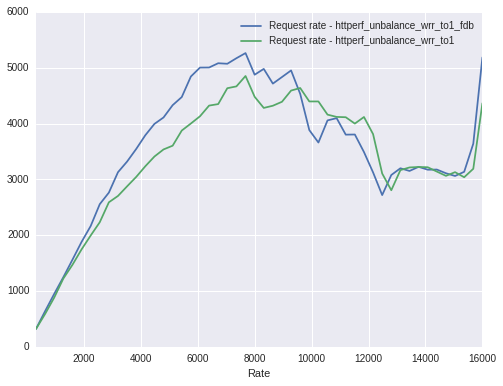

In [9]:
plot_request_unbalance.plot('Rate')

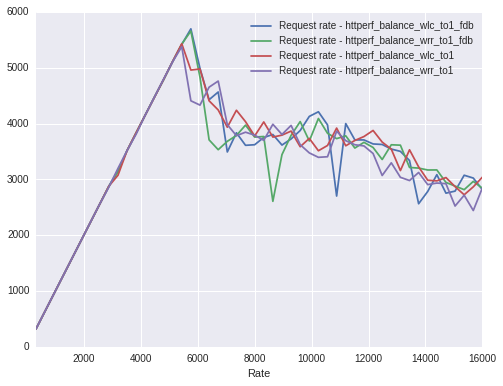

In [10]:
plot_request_balance.plot('Rate')

In [11]:
plot_request_unbalance.describe()

,Rate,Request rate - httperf_unbalance_wrr_to1_fdb,Request rate - httperf_unbalance_wrr_to1
count,50.000000,50.000000,50.000000
mean,8160.000000,3577.782000,3375.414000
std,4664.761516,1239.070605,1118.606565
min,320.000000,319.800000,320.000000
25%,4240.000000,3113.825000,3040.025000
50%,8160.000000,3650.450000,3473.500000
75%,12080.000000,4670.675000,4310.450000
max,16000.000000,5263.600000,4853.400000


In [12]:
plot_request_balance.describe()

,Rate,Request rate - httperf_balance_wlc_to1_fdb,Request rate - httperf_balance_wrr_to1_fdb,Request rate - httperf_balance_wlc_to1,Request rate - httperf_balance_wrr_to1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,3377.050000,3342.318000,3394.754000,3295.716000
std,4664.761516,1130.738578,1088.639806,1089.993505,1075.445836
min,320.000000,320.000000,320.000000,320.000000,320.000000
25%,4240.000000,2796.625000,2896.725000,2976.675000,2873.400000
50%,8160.000000,3613.150000,3567.150000,3605.200000,3469.500000
75%,12080.000000,3951.775000,3787.825000,3931.375000,3859.075000
max,16000.000000,5698.000000,5658.300000,5430.900000,5378.500000


### 2. Response time analysis

In [13]:
plot_response_unbalance = pd.DataFrame()
plot_response_balance = pd.DataFrame()

plot_response_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_response_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_response_unbalance['Response time - ' + d] = data_dict[d]['Response time']
    if '_balance_' in d:
        plot_response_balance['Response time - ' + d] = data_dict[d]['Response time']

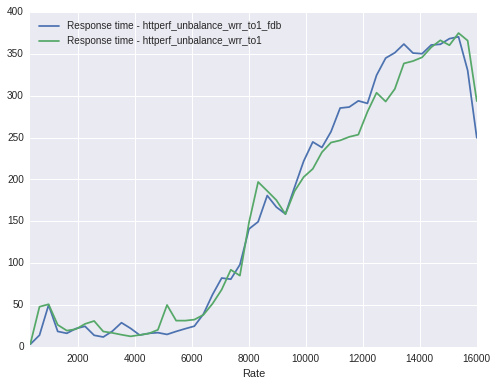

In [14]:
plot_response_unbalance.plot('Rate')

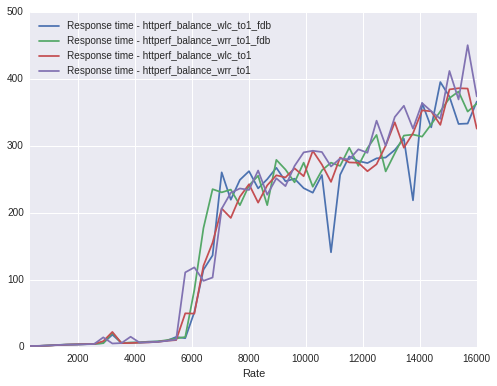

In [15]:
plot_response_balance.plot('Rate')

In [16]:
plot_response_unbalance.describe()

,Rate,Response time - httperf_unbalance_wrr_to1_fdb,Response time - httperf_unbalance_wrr_to1
count,50.000000,50.000000,50.000000
mean,8160.000000,159.221625,156.866000
std,4664.761516,137.692285,130.801810
min,320.000000,3.112500,3.600000
25%,4240.000000,21.656250,30.953125
50%,8160.000000,145.093750,153.528125
75%,12080.000000,289.720312,273.975000
max,16000.000000,370.350000,374.831250


In [17]:
plot_response_balance.describe()

,Rate,Response time - httperf_balance_wlc_to1_fdb,Response time - httperf_balance_wrr_to1_fdb,Response time - httperf_balance_wlc_to1,Response time - httperf_balance_wrr_to1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,170.052125,178.858875,175.613750,186.213250
std,4664.761516,137.520184,139.148703,139.907279,147.732167
min,320.000000,1.175000,1.206250,1.225000,1.200000
25%,4240.000000,7.754687,7.440625,7.651563,7.804688
50%,8160.000000,233.371875,237.231250,232.681250,235.337500
75%,12080.000000,276.571875,286.506250,280.821875,294.385938
max,16000.000000,395.381250,381.200000,386.168750,450.450000


### 3. Success rate analysis

In [18]:
plot_success_unbalance = pd.DataFrame()
plot_success_balance = pd.DataFrame()

plot_success_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_success_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_success_unbalance['Success rate - ' + d] = (data_dict[d]['Response status 2xx'] + 
                                                         data_dict[d]['Response status 3xx']) / data_dict[d]['Number of requests'] * 100.0
    if '_balance_' in d:
        plot_success_balance['Success rate - ' + d] = (data_dict[d]['Response status 2xx'] + 
                                                       data_dict[d]['Response status 3xx']) / data_dict[d]['Number of requests'] * 100.0

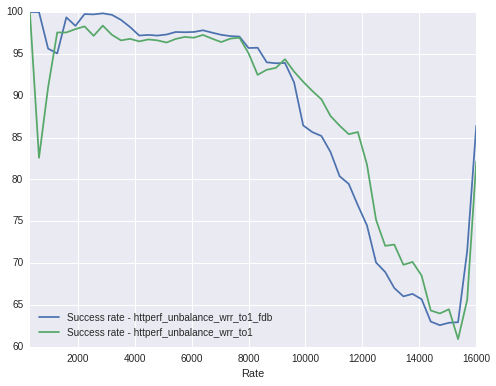

In [19]:
plot_success_unbalance.plot('Rate')

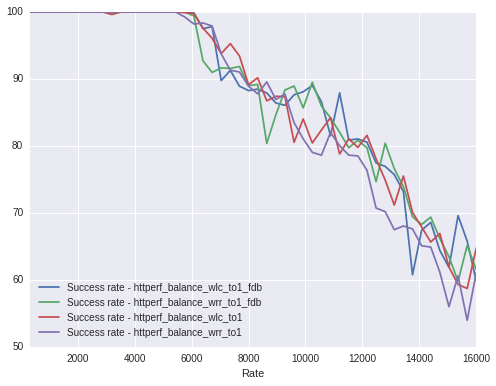

In [20]:
plot_success_balance.plot('Rate')

In [21]:
plot_success_unbalance.describe()

,Rate,Success rate - httperf_unbalance_wrr_to1_fdb,Success rate - httperf_unbalance_wrr_to1
count,50.000000,50.000000,50.000000
mean,8160.000000,87.661245,88.029359
std,4664.761516,13.212992,11.818414
min,320.000000,62.583115,60.912362
25%,4240.000000,77.546331,82.258964
50%,8160.000000,95.334814,93.210461
75%,12080.000000,97.603481,96.818341
max,16000.000000,100.000000,100.000000


In [22]:
plot_success_balance.describe()

,Rate,Success rate - httperf_balance_wlc_to1_fdb,Success rate - httperf_balance_wrr_to1_fdb,Success rate - httperf_balance_wlc_to1,Success rate - httperf_balance_wrr_to1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,87.740770,87.498166,87.280239,85.905768
std,4664.761516,12.896921,12.653779,13.303998,14.750354
min,320.000000,59.829666,59.794872,58.705842,53.953551
25%,4240.000000,80.639781,79.891117,79.036157,76.900874
50%,8160.000000,88.702463,89.342376,89.660168,89.238626
75%,12080.000000,100.000000,100.000000,100.000000,100.000000
max,16000.000000,100.000000,100.000000,100.000000,100.000000


## Server-side analysis

In [25]:
# read in the data
stats_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*"):
    stats_frame = pd.read_csv(d + "/httperf_server_stats.csv", header=0, na_filter=False)
    for i in ['Connections', 'Packets', 'Bytes (K)']:
        stats_frame[i + ' Ratio (%)'] = stats_frame[i] / sum(stats_frame[i]) * 100
    
    stats_dict[os.path.basename(d)] = stats_frame

### 1. Connections ratio (%)

In [26]:
plot_connections_unbalance = pd.DataFrame()
plot_connections_balance = pd.DataFrame()

plot_connections_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_connections_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_connections_unbalance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']
    if '_balance_' in d:
        plot_connections_balance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']

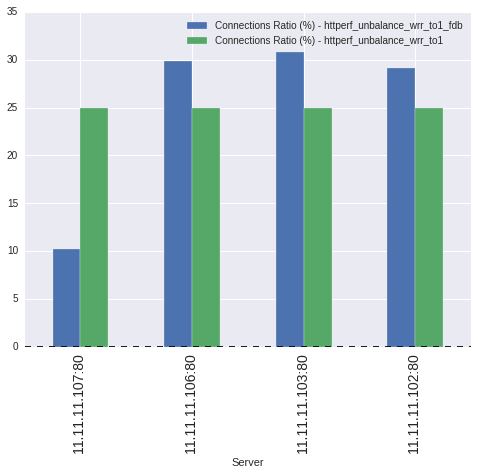

In [27]:
plot_connections_unbalance.plot('Server', kind='bar')

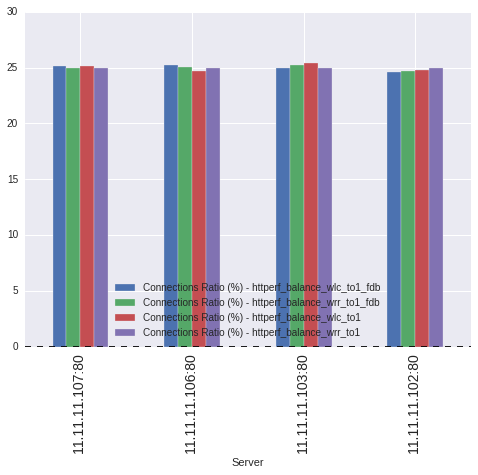

In [28]:
plot_connections_balance.plot('Server', kind='bar')

### 2. Packets ratio (%)

In [29]:
plot_packets_unbalance = pd.DataFrame()
plot_packets_balance = pd.DataFrame()

plot_packets_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_packets_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_packets_unbalance['Packets Ratio (%) - ' + d] = stats_dict[d]['Packets Ratio (%)']
    if '_balance_' in d:
        plot_packets_balance['Packets Ratio (%) - ' + d] = stats_dict[d]['Packets Ratio (%)']

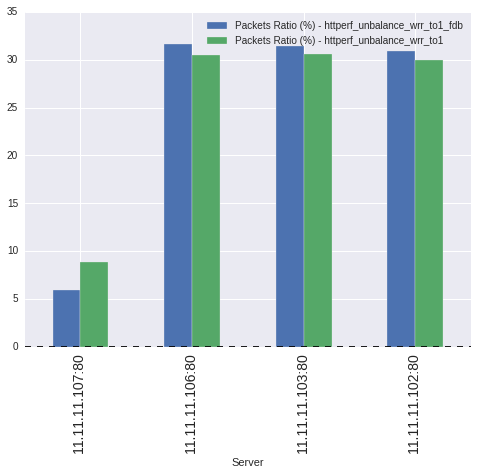

In [30]:
plot_packets_unbalance.plot('Server', kind='bar')

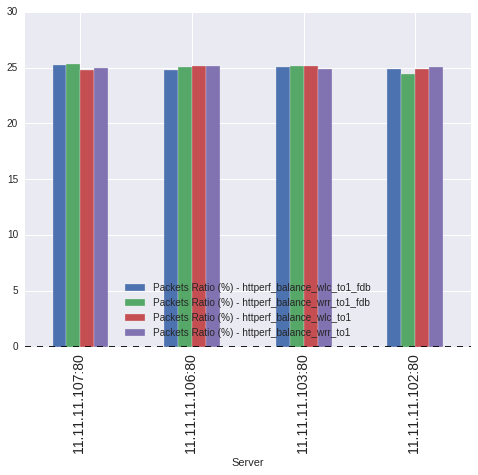

In [31]:
plot_packets_balance.plot('Server', kind='bar')

### 3. Bytes ratio (%)

In [32]:
plot_bytes_unbalance = pd.DataFrame()
plot_bytes_balance = pd.DataFrame()

plot_bytes_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_bytes_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_bytes_unbalance['Bytes (K) Ratio (%) - ' + d] = stats_dict[d]['Bytes (K) Ratio (%)']
    if '_balance_' in d:
        plot_bytes_balance['Bytes (K) Ratio (%) - ' + d] = stats_dict[d]['Bytes (K) Ratio (%)']

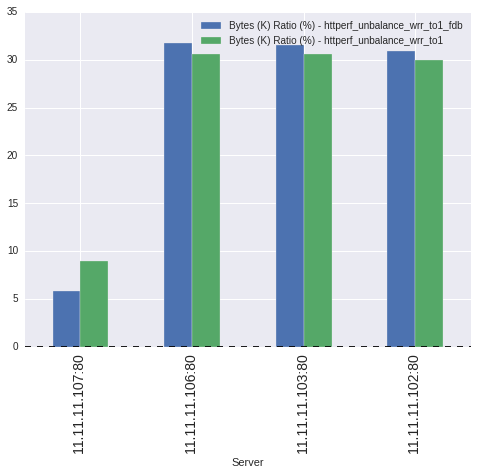

In [33]:
plot_bytes_unbalance.plot('Server', kind='bar')

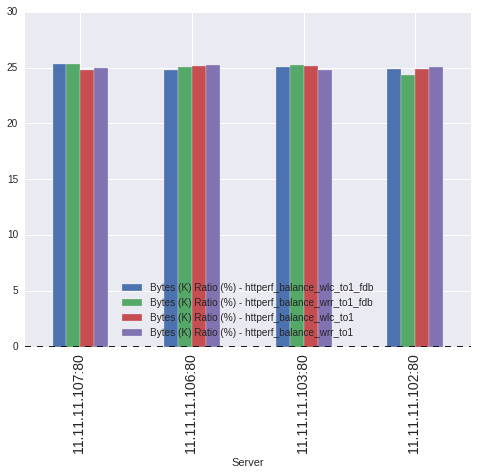

In [34]:
plot_bytes_balance.plot('Server', kind='bar')